In [1]:
# Cell 1: Imports and Configuration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
%matplotlib inline

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [2]:
# Cell 2: Simulate Store Metadata (Location, Type, etc.)

num_stores = 120

store_ids = [f"S{1000+i}" for i in range(num_stores)]
cities = np.random.choice(
    ["Trieste","Rome","Milan","London","Paris","New York","Barcelona","Tokyo","Shanghai"],
    size=num_stores
)

store_types = np.random.choice(
    ["Cafe","Retail","Outlet","Airport Kiosk"], size=num_stores
)

store_df = pd.DataFrame({
    "StoreID": store_ids,
    "City": cities,
    "StoreType": store_types
})

store_df.head()

,StoreID,City,StoreType
0,S1000,Barcelona,Airport Kiosk
1,S1001,London,Retail
2,S1002,Tokyo,Retail
3,S1003,Paris,Cafe
4,S1004,Barcelona,Retail


In [4]:
# Cell 3: Simulate Monthly Sales & Profit Margins

months = pd.date_range(start="2024-01-01", periods=12, freq="ME")

sales_data = []

for idx, row in store_df.iterrows():
    base_sales = np.random.randint(40000, 180000)  # base monthly revenue
    
    for m in months:
        # simulate variation
        monthly_sales = base_sales + np.random.normal(0, 12000)
        profit_margin = np.clip(np.random.normal(0.17, 0.05), 0.08, 0.30)
        
        sales_data.append({
            "StoreID": row["StoreID"],
            "Month": m,
            "Sales": round(monthly_sales, 2),
            "ProfitMargin": round(profit_margin, 3),
            "Profit": round(monthly_sales * profit_margin, 2)
        })

sales_df = pd.DataFrame(sales_data)
sales_df.head()

,StoreID,Month,Sales,ProfitMargin,Profit
0,S1000,2024-01-31,66732.94,0.102,6784.30
1,S1000,2024-02-29,83224.27,0.139,11551.82
2,S1000,2024-03-31,93529.44,0.080,7482.36
3,S1000,2024-04-30,97027.65,0.117,11376.05
4,S1000,2024-05-31,111472.27,0.156,17444.43


In [5]:
# Cell 4: Simulate Demographics of Store Areas

demographics_data = []

for idx, row in store_df.iterrows():
    population = np.random.randint(50000, 800000)
    median_age = np.random.uniform(25, 50)
    avg_income = np.random.randint(30000, 120000)
    pct_coffee_lovers = np.random.uniform(0.45, 0.85)
    
    demographics_data.append({
        "StoreID": row["StoreID"],
        "Population": population,
        "MedianAge": round(median_age, 1),
        "AvgIncome": avg_income,
        "PctCoffeeLovers": round(pct_coffee_lovers, 3)
    })

demo_df = pd.DataFrame(demographics_data)
demo_df.head()

,StoreID,Population,MedianAge,AvgIncome,PctCoffeeLovers
0,S1000,718795,48.3,66135,0.494
1,S1001,643775,47.6,77655,0.472
2,S1002,769542,35.6,76514,0.667
3,S1003,534103,29.5,31160,0.774
4,S1004,789663,46.9,49924,0.657


In [6]:
# Cell 5: Combine Sales + Store + Demographics

full_df = sales_df.merge(store_df, on="StoreID").merge(demo_df, on="StoreID")
full_df.head()

,StoreID,Month,Sales,ProfitMargin,Profit,City,StoreType,Population,MedianAge,AvgIncome,PctCoffeeLovers
0,S1000,2024-01-31,66732.94,0.102,6784.30,Barcelona,Airport Kiosk,718795,48.3,66135,0.494
1,S1000,2024-02-29,83224.27,0.139,11551.82,Barcelona,Airport Kiosk,718795,48.3,66135,0.494
2,S1000,2024-03-31,93529.44,0.080,7482.36,Barcelona,Airport Kiosk,718795,48.3,66135,0.494
3,S1000,2024-04-30,97027.65,0.117,11376.05,Barcelona,Airport Kiosk,718795,48.3,66135,0.494
4,S1000,2024-05-31,111472.27,0.156,17444.43,Barcelona,Airport Kiosk,718795,48.3,66135,0.494


In [7]:
# Cell 6: Quick Summary Stats

print("Total Sales Summary by Store Type:")
print(full_df.groupby("StoreType")["Sales"].sum().sort_values(ascending=False))

print("\nOverall Average Profit Margin:")
print(full_df["ProfitMargin"].mean())

print("\nTop 5 Cities by Total Revenue:")
print(full_df.groupby("City")["Sales"].sum().nlargest(5))

Total Sales Summary by Store Type:
StoreType
Airport Kiosk    48966986.65
Cafe             38785541.82
Outlet           35887222.47
Retail           35869188.20
Name: Sales, dtype: float64

Overall Average Profit Margin:
0.16846388888888889

Top 5 Cities by Total Revenue:
City
Barcelona    24134384.40
Tokyo        23474012.14
Paris        19496829.77
Milan        18778181.42
London       17991545.60
Name: Sales, dtype: float64


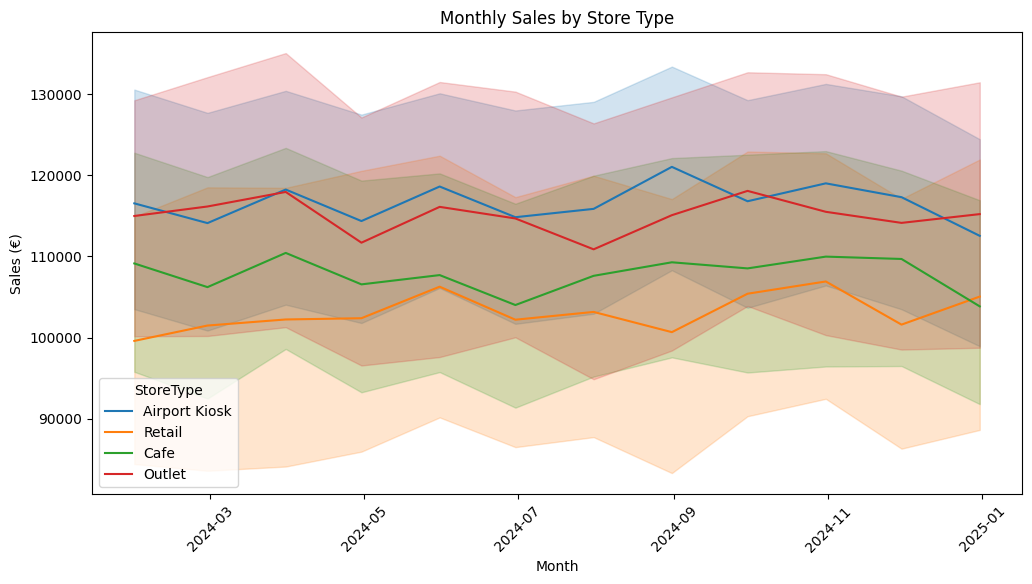

In [8]:
# Cell 7: Visualize Monthly Sales Trends

plt.figure(figsize=(12,6))
sns.lineplot(data=full_df, x="Month", y="Sales", hue="StoreType")
plt.title("Monthly Sales by Store Type")
plt.ylabel("Sales (€)")
plt.xticks(rotation=45)
plt.show()

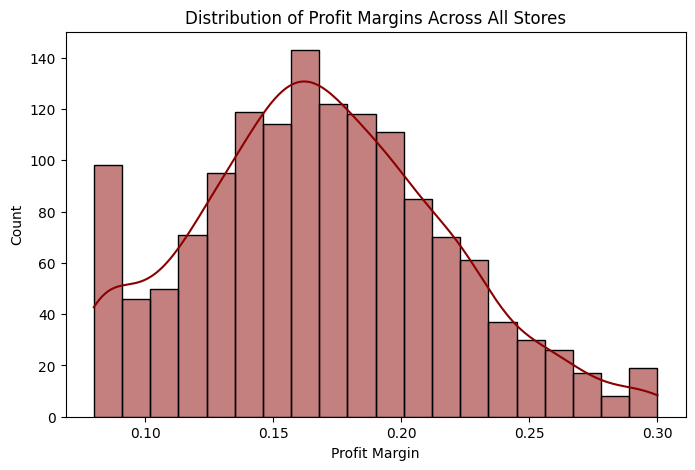

In [9]:
# Cell 8: Profit Margin Distribution

plt.figure(figsize=(8,5))
sns.histplot(full_df["ProfitMargin"], bins=20, kde=True, color="darkred")
plt.title("Distribution of Profit Margins Across All Stores")
plt.xlabel("Profit Margin")
plt.show()

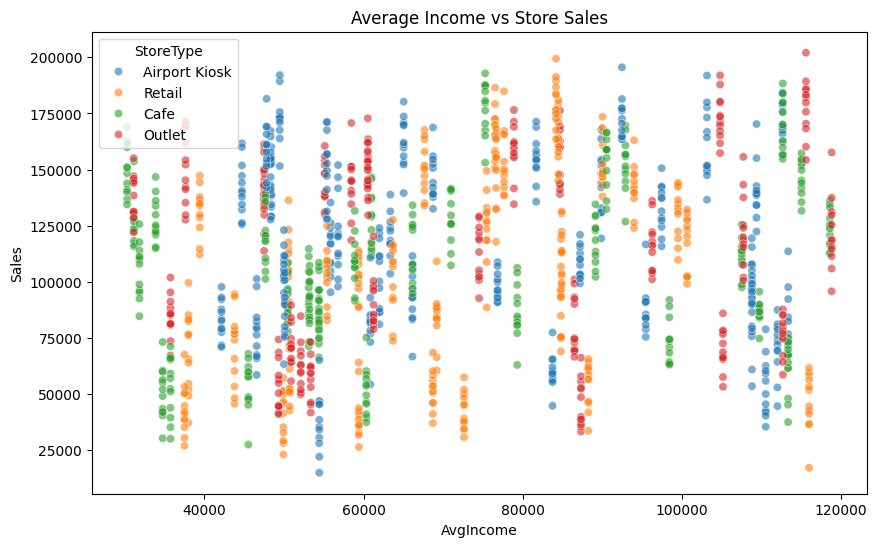

In [10]:
# Cell 9: Demographics vs Sales Scatter

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=full_df,
    x="AvgIncome",
    y="Sales",
    hue="StoreType",
    alpha=0.6
)
plt.title("Average Income vs Store Sales")
plt.show()